# SEQC2

In [42]:
# Imports

%load_ext autoreload
%autoreload 2

import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pysam
import warnings
from tqdm.notebook import tqdm
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

# set working directory
if not os.getcwd().endswith('cfdna_snv_benchmark'):
    os.chdir('../')
print('Current working directory: {}'.format(os.getcwd()))

from utils.config import Config
from utils.viz import *
from utils.table import *
from utils.metrics import *
from utils.calltable import *
from utils.calltableseries import *
from utils.groundtruth import *
from utils.metricsseries import *
from utils.venn import venn6, get_labels

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working directory: /Users/hanae/Repositories/cfdna_snv_benchmark


In [99]:
# Config and Display paramaters

config = Config("config/", "config_viz.yaml")
set_display_params(config)
print(config.methods)

paper
['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan', 'BRP']


In [100]:
# Chomosome

# mixtureids =  ['CRC-1014_180816-CW-T_CRC-1014_090516-CW-T', 'CRC-986_100215-CW-T_CRC-986_300316-CW-T', 'CRC-123_310715-CW-T_CRC-123_121115-CW-T']
mixtureid = 'BRP2_ST26_25ng_LIB1-P'
reload = True
save = True
fixedvars=['coverage', 'ctdna']
filterparam = 'all'

markers = ['o', '^', 'X']
linestyles = ['-', '-', '-']
color_dict = {config.methods[i]: config.colors[i] for i in range(len(config.methods))}

muttypes = ['snv', 'indel']
metrics = ['auprc', 'precision', 'recall']

# Part I: (1) Load/Generate call tables, (2) Generate Ground truths and (3) Compute/Save metrics per patient

############# BRP2_ST26_25ng_LIB1-P ############
SEQC2 ['data', 'SEQC2']
data/SEQC2/SEQC2s_chrall/SEQC2s_chrall_BRP2_ST26_25ng_LIB1-P
SampleDf_BRP2_ST26_25ng_LIB1-P
True reload
SampleDf_BRP2_ST26_25ng_LIB1-P
freebayes
mutect2
retrieving mutect2 22 calls with MinAF tags out of 145
strelka2
retrieving strelka2 28 calls with MinAF tags out of 186
vardict
retrieving vardict 17 calls with f0.01;REJECT;REJECT tags out of 229
varscan
BRP
# calls before using germline calls from GATK Haplotype: 420 SNV, 51 INDEL, 0 SNP
# calls after using germline calls from GATK Haplotype: 346 SNV, 49 INDEL, 76 SNP
final shape SNV: (346, 35)
final shape INDEL: (49, 35)
final shape SNP: (76, 35)
0
(346, 35)
0
(49, 35)
0
(76, 35)
SampleEf_BRP2_ST26_25ng_LIB1-P
True reload
SampleEf_BRP2_ST26_25ng_LIB1-P
freebayes
mutect2
retrieving mutect2 24 calls with MinAF tags out of 32
strelka2
retrieving strelka2 9 calls with MinAF tags out of 44
vardict
retrieving vardict 14 calls with f0.01;REJECT;REJECT tags out of 57
v


42340
230
False    199
True     162
Name: truth, dtype: int64
SampleDf_BRP2_ST26_25ng_LIB1-P
SampleDf_freebayes_score
is present
SampleDf_mutect2_score
is present
SampleDf_strelka2_score
is present
SampleDf_vardict_score
is present
SampleDf_varscan_score
is present
SampleDf_BRP_score
is present
SampleEf_BRP2_ST26_25ng_LIB1-P
SampleEf_freebayes_score
is present
SampleEf_mutect2_score
is present
SampleEf_strelka2_score
is present
SampleEf_vardict_score
is present
SampleEf_varscan_score
is present
SampleEf_BRP_score
is present
    AUPRC score  AUPRC score - baseline AUPRC score samplename     caller
0      1.000000                            0.551247   SampleDf  freebayes
1      0.716814                            0.268061   SampleDf    mutect2
2      1.000000                            0.551247   SampleDf   strelka2
3      0.586957                            0.138203   SampleDf    vardict
4      0.936416                            0.487663   SampleDf    varscan
5      1.000000          

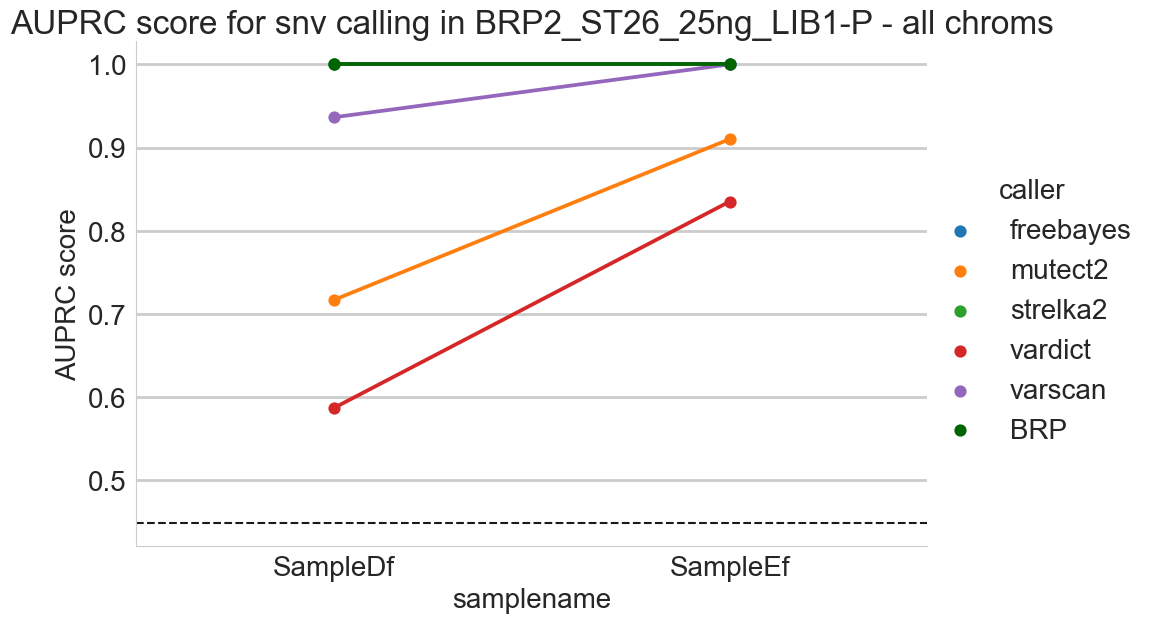

SampleDf_BRP2_ST26_25ng_LIB1-P
SampleDf_freebayes_score
is present
SampleDf_mutect2_score
is present
SampleDf_strelka2_score
is present
SampleDf_vardict_score
is present
SampleDf_varscan_score
is present
SampleDf_BRP_score
is present
SampleEf_BRP2_ST26_25ng_LIB1-P
SampleEf_freebayes_score
is present
SampleEf_mutect2_score
is present
SampleEf_strelka2_score
is present
SampleEf_vardict_score
is present
SampleEf_varscan_score
is present
SampleEf_BRP_score
is present
    AUC score samplename     caller
0         NaN   SampleDf  freebayes
1         NaN   SampleDf    mutect2
2         NaN   SampleDf   strelka2
3         NaN   SampleDf    vardict
4         NaN   SampleDf    varscan
5         NaN   SampleDf        BRP
6         NaN   SampleEf  freebayes
7         NaN   SampleEf    mutect2
8         NaN   SampleEf   strelka2
9         NaN   SampleEf    vardict
10        NaN   SampleEf    varscan
11        NaN   SampleEf        BRP


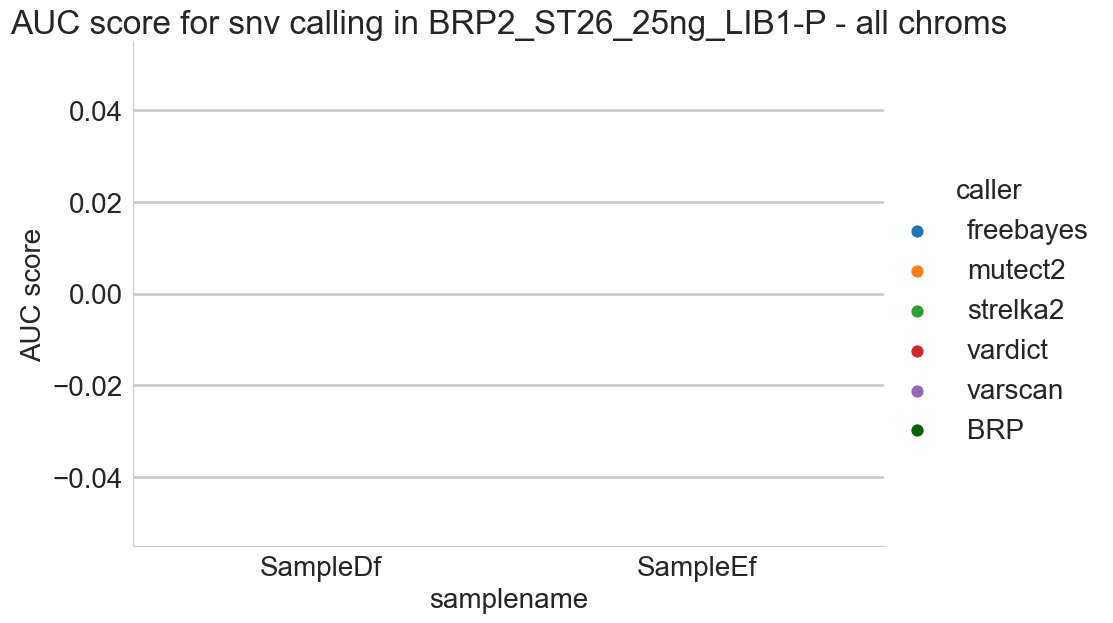

['SampleDf_BRP2_ST26_25ng_LIB1-P', 'SampleEf_BRP2_ST26_25ng_LIB1-P']
SampleDf_freebayes_score
SampleEf_freebayes_score
['SampleDf_BRP2_ST26_25ng_LIB1-P', 'SampleEf_BRP2_ST26_25ng_LIB1-P']
SampleDf_mutect2_score
SampleEf_mutect2_score
['SampleDf_BRP2_ST26_25ng_LIB1-P', 'SampleEf_BRP2_ST26_25ng_LIB1-P']
SampleDf_strelka2_score
SampleEf_strelka2_score
['SampleDf_BRP2_ST26_25ng_LIB1-P', 'SampleEf_BRP2_ST26_25ng_LIB1-P']
SampleDf_vardict_score
SampleEf_vardict_score
['SampleDf_BRP2_ST26_25ng_LIB1-P', 'SampleEf_BRP2_ST26_25ng_LIB1-P']
SampleDf_varscan_score
SampleEf_varscan_score
['SampleDf_BRP2_ST26_25ng_LIB1-P', 'SampleEf_BRP2_ST26_25ng_LIB1-P']
SampleDf_BRP_score
SampleEf_BRP_score
['SampleDf_BRP2_ST26_25ng_LIB1-P', 'SampleEf_BRP2_ST26_25ng_LIB1-P']


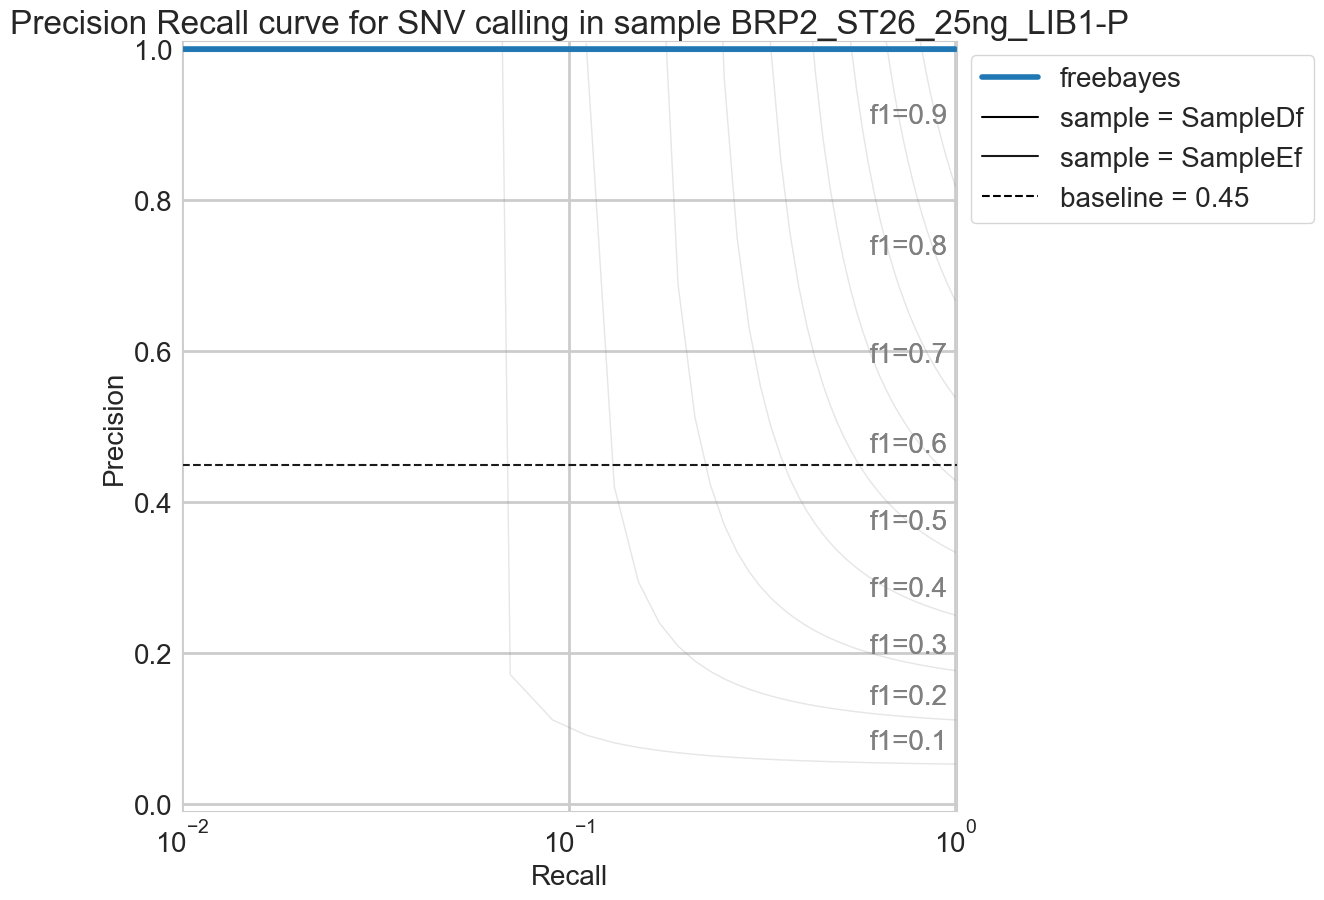

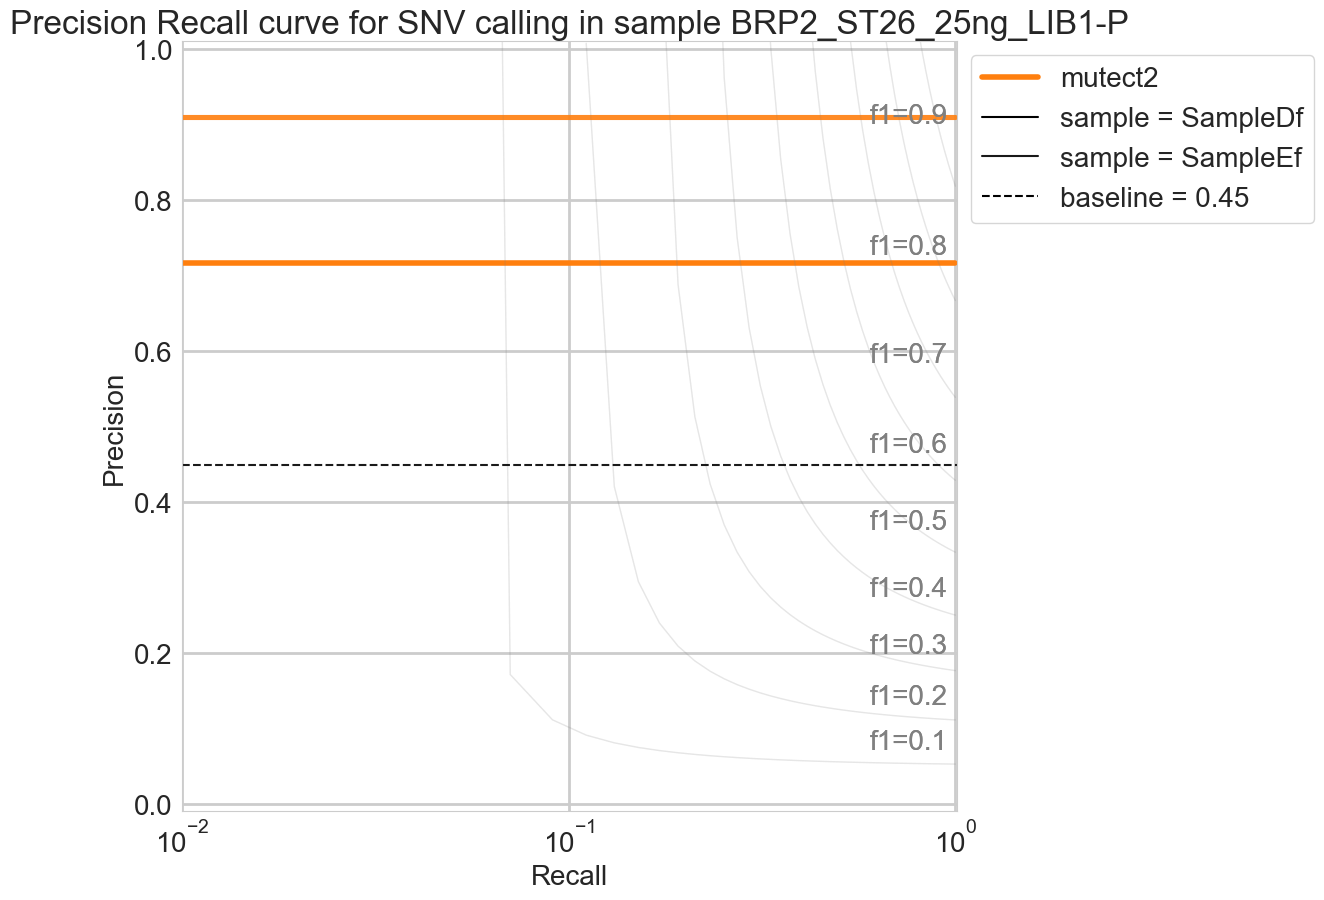

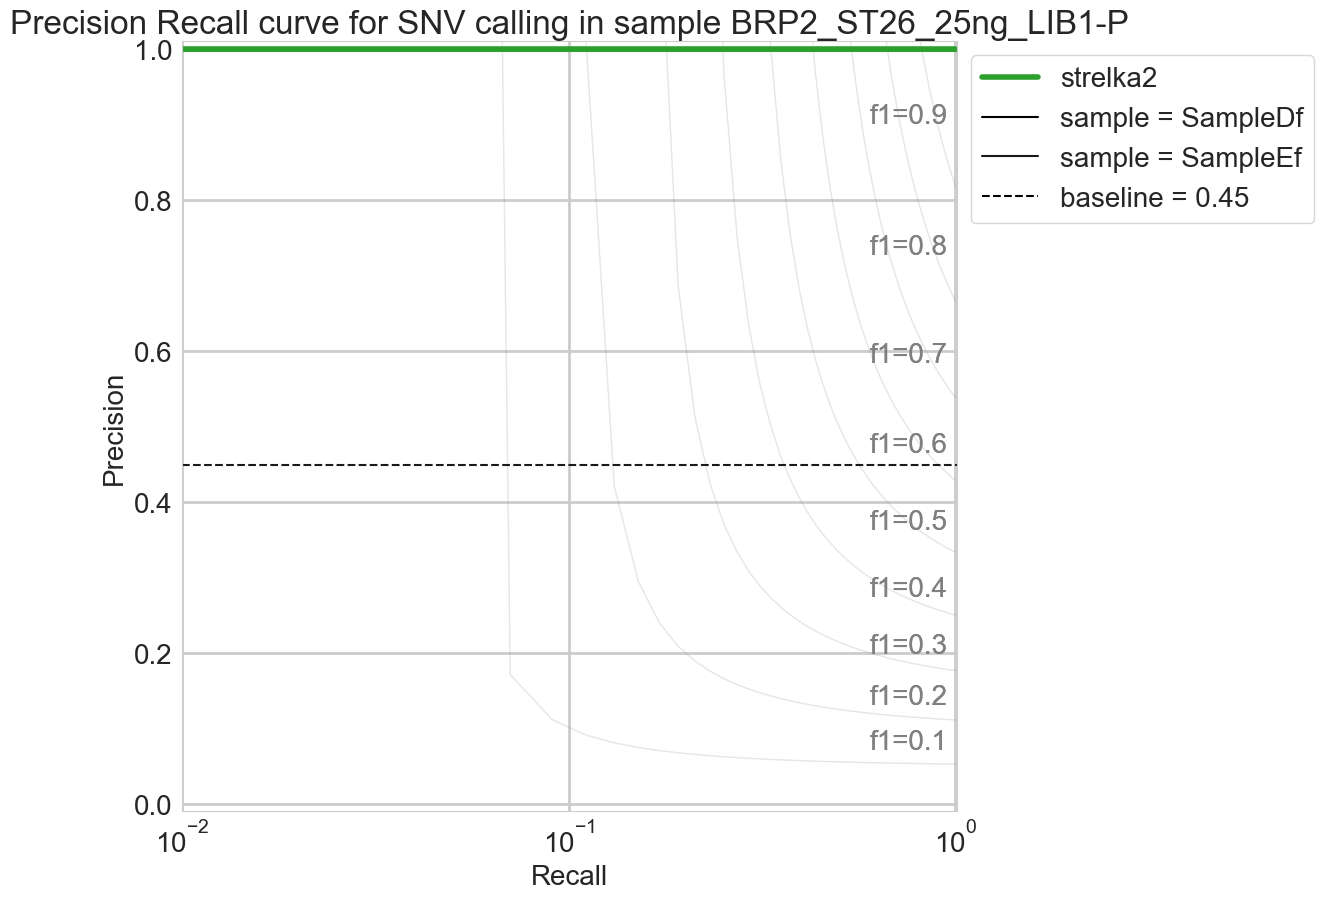

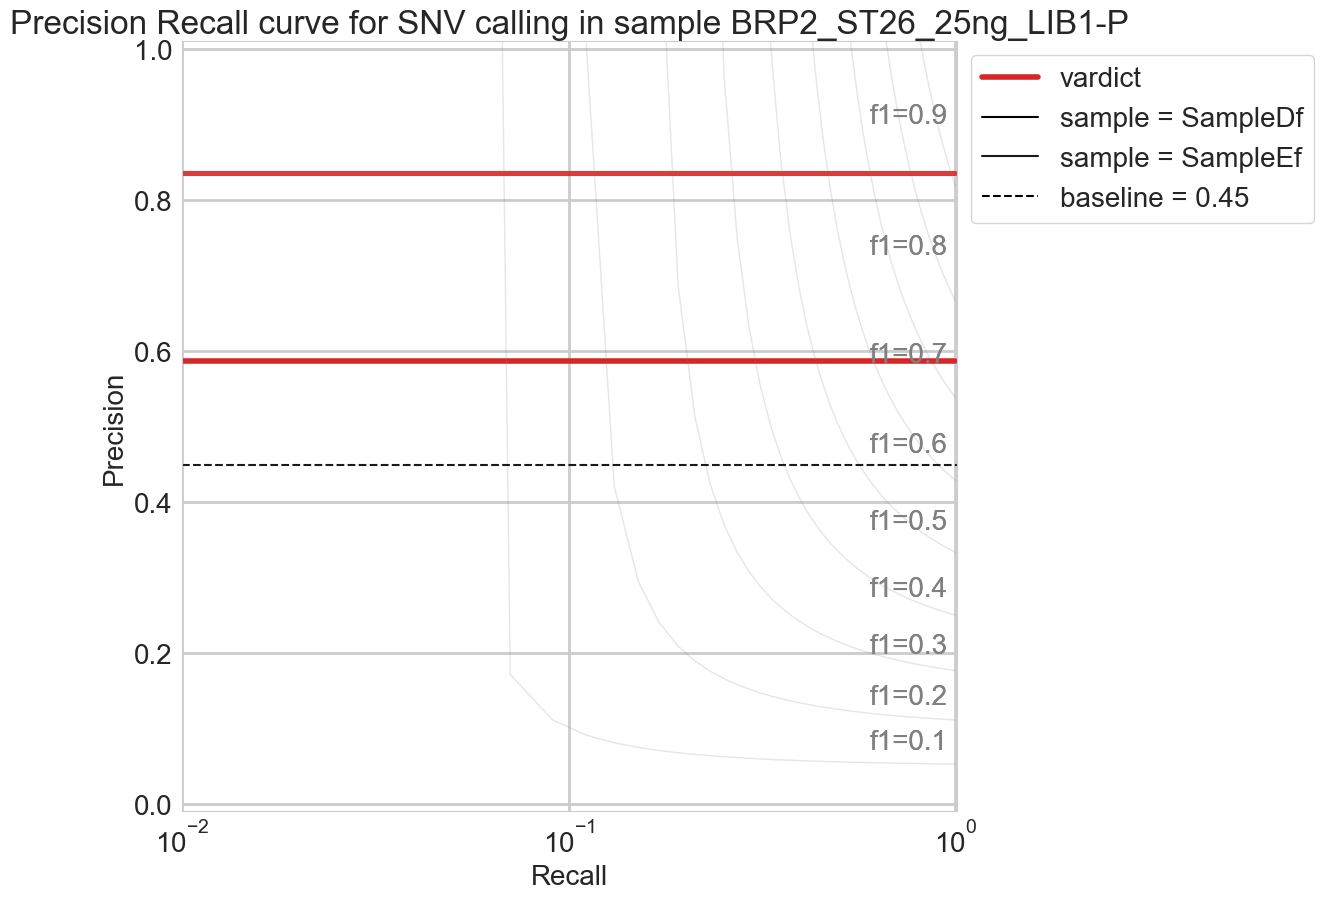

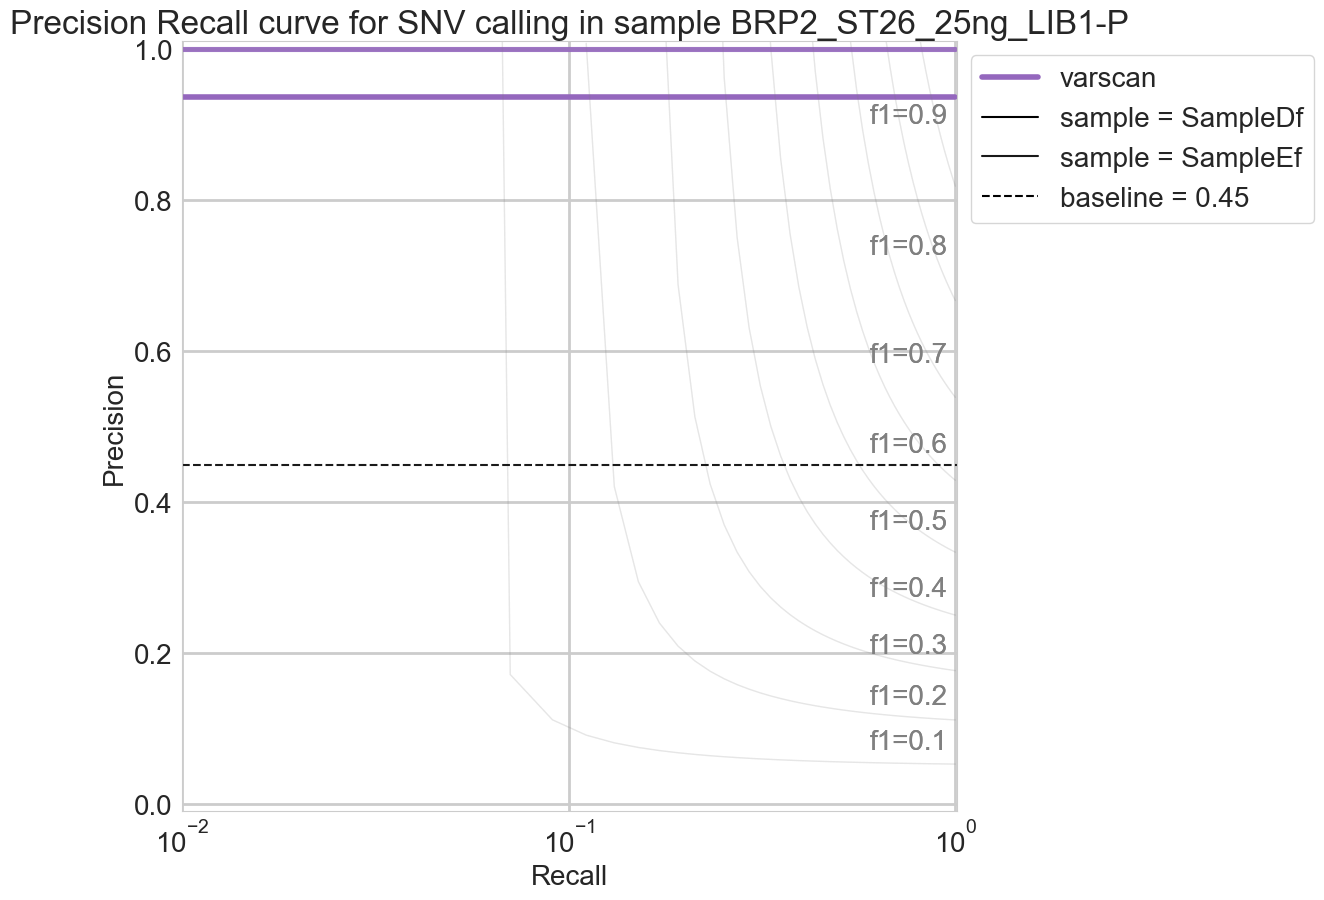

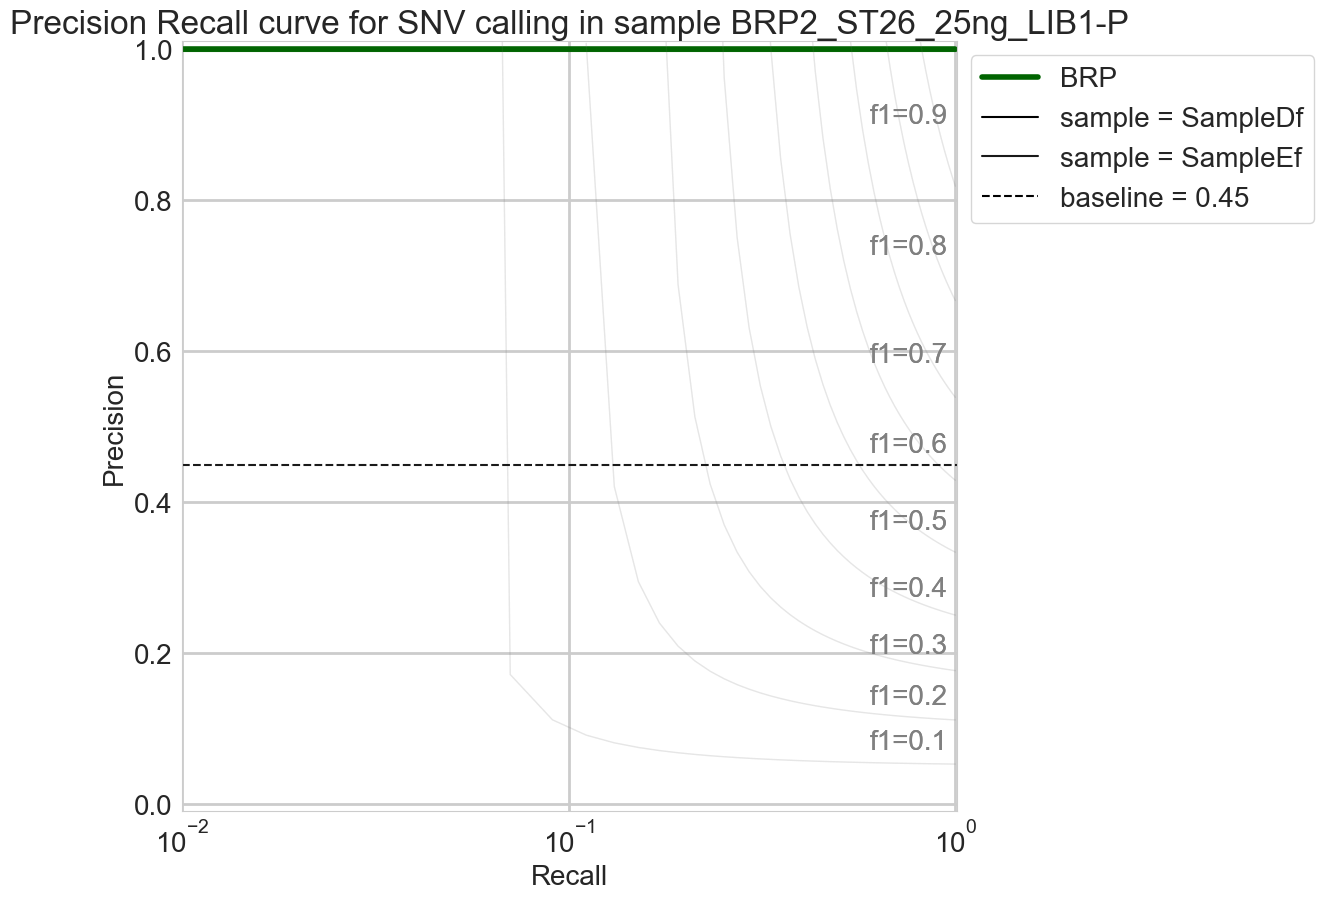

In [107]:
#for mixtureid in mixtureids:
seriesorder = ['SampleDf', 'SampleEf']
print('############# {} ############'.format(mixtureid))
calltables = {'sampleid':[], 'tf':[], 'cov':[], 'snv':[], 'indel':[], 'snp':[]}
calltable_snv, aux = get_calltableseries(config, mixtureid, chrom='all', muttype='snv', filterparam=filterparam, reload=reload, save=save, diltype='SEQC2', concat='tf')
calltable_indel, aux = get_calltableseries(config, mixtureid, chrom='all', muttype='indel', filterparam=filterparam, reload=reload, save=save, diltype='SEQC2', concat='tf')
calltable_snp, aux = get_calltableseries(config, mixtureid, chrom='all', muttype='snp', filterparam=filterparam, reload=reload, save=save, diltype='SEQC2', concat='tf')
print(calltable_snv.shape, calltable_indel.shape, calltable_snp.shape)
print(aux)
calltables['snv'].append(calltable_snv)
calltables['indel'].append(calltable_indel)
calltables['snp'].append(calltable_snp)
calltables['sampleid'] = mixtureid 
#calltables['tf'] = np.unique([cn.split('_')[0] for cn in list(calltable_snv.columns)])[:-5].astype(float)
calltables['snv'] = pd.concat(calltables['snv'])
calltables['indel'] = pd.concat(calltables['indel'])
calltables['snp'] = pd.concat(calltables['snp'])
#dilutionseries
dilutionseries = aux
#dilutionseries = aux.T[['mixture_' + '_'.join(mixtureid.split('_')[:2]) + '_' + str(s[0]) + 'x_' + '_'.join(mixtureid.split('_')[2:4]) + '_' + str(s[1]) + 'x' for s in seriesorder]].T
muttype = 'snv'
refsample = 'SEQC2'
# ground truth
groundtruths = read_vcf(os.path.join(*config.mixturefolderSEQC2, 'ground_truths', 'KnownPositives_hg19.vcf'))
groundtruths['CHROM'] = groundtruths['CHROM'].str.replace('chr', '')
groundtruths['chrom_pos_ref_alt'] = groundtruths['CHROM'].astype(str).str.cat(groundtruths['POS'].astype('str'), sep='_').str.cat(groundtruths['REF'].astype('str'), sep='_').str.cat(groundtruths['ALT'].astype('str'), sep='_')
groundtruths.set_index('chrom_pos_ref_alt', inplace=True)

bedfile = pd.read_csv(os.path.join(*config.mixturefolderSEQC2, 'bedfiles', 'LBx_BRP_hg19.bed'), sep='\t', header=None)
bedfile.columns = ['chrom', 'startpos', 'endpos', 'gene']
bedfile['chrom'] = bedfile['chrom'].str.replace('chr', '')

groundtruth_outside_bed = []
for idx, row in tqdm(groundtruths.iterrows(), total=groundtruths.shape[0]):
    chrom = row['CHROM']
    pos = row['POS']
    ref = row['REF']
    alt = row['ALT']
    aux = bedfile[bedfile['chrom'] == str(chrom)]
    count = False
    for ind in list(aux.index):
        #print(aux['endpos'][ind], aux['startpos'][ind])
        if aux['endpos'][ind] >= int(pos):
            if aux['startpos'][ind] <= int(pos):
                count = True
    if not count:
        groundtruth_outside_bed.append(chrom + '_'+ str(pos) + '_'+ ref + '_'+ alt)
print(len(groundtruth_outside_bed))
groundtruths_in_bed = groundtruths.drop(groundtruth_outside_bed)
print(groundtruths_in_bed.shape[0])
calltablesseries = calltables[muttype]
calltablesseries['truth'] = False
calltablesseries[calltablesseries.index.isin(list(groundtruths_in_bed.index))] = True
print(calltablesseries['truth'].value_counts())
# metrics
results_auprc_df = metric_curve_allchr(config, calltablesseries, dilutionseries, mixtureid, metric='auprc', ground_truth_method='SEQC2',
                                 refsample='SEQC2', muttype=muttype, methods=config.methods)
results_auc_df = metric_curve_allchr(config, calltablesseries, dilutionseries, mixtureid, metric='auc',  ground_truth_method='SEQC2',
                                 refsample='SEQC2', muttype=muttype, methods=config.methods)
figure_curve_allchr(config, calltablesseries, dilutionseries, mixtureid, xy='pr', ground_truth_method='SEQC2',
                                 refsample='SEQC2', muttype=muttype, methods=config.methods)
                #    ground_truth_method=gtm,
                #    refsample=refsample, muttype=muttype.upper(), methods=None, fixedvar=fixedvar, save=save)